In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/leukemia-classification

leukemia-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip leukemia-classification.zip

Archive:  leukemia-classification.zip
replace C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/1.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
import keras
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from keras.preprocessing.image import ImageDataGenerator
import os
import glob
from numpy import expand_dims
from sklearn.utils.class_weight import compute_class_weight
from sklearn import preprocessing
import cv2
import tensorflow as tf

In [ ]:
# Specify the path to the image folders
image_folders = [
    "/content/C-NMC_Leukemia/training_data/fold_0/all",
    "/content/C-NMC_Leukemia/training_data/fold_1/all",
    "/content/C-NMC_Leukemia/training_data/fold_2/all",
    "/content/C-NMC_Leukemia/training_data/fold_0/hem",
    "/content/C-NMC_Leukemia/training_data/fold_1/hem",
    "/content/C-NMC_Leukemia/training_data/fold_2/hem"
]

# Create lists for each fold
all_list_folds = [[] for _ in range(3)]
hem_list_folds = [[] for _ in range(3)]
all_list_labels = [[] for _ in range(3)]
hem_list_labels = [[] for _ in range(3)]
validation_set = []
testing_set = []

# Iterate over each folder
for folder_count, folder in enumerate(image_folders):
    # Search for files with specified extensions in the folder
    folder_files = glob.glob(os.path.join(folder, "*.bmp"))

    # Iterate over each filename in the folder_files list
    for filename in folder_files:
        # Open the image file and append it to the respective fold list
        img = cv2.imread(filename)
        img = cv2.resize(img, (224, 224))

        if folder_count < 3:
            all_list_folds[folder_count].append(img)
            all_list_labels[folder_count].append([1])
        else:
            hem_list_folds[folder_count - 3].append(img)
            hem_list_labels[folder_count - 3].append([0])

# Extract separate lists from the fold lists
all_list_fold0 = all_list_folds[0]
all_list_fold1 = all_list_folds[1]
all_list_fold2 = all_list_folds[2]
hem_list_fold0 = hem_list_folds[0]
hem_list_fold1 = hem_list_folds[1]
hem_list_fold2 = hem_list_folds[2]

all_list_fold0_labels= all_list_labels[0]
all_list_fold1_labels= all_list_labels[1]
all_list_fold2_labels= all_list_labels[2]
hem_list_fold0_labels= hem_list_labels[0]
hem_list_fold1_labels= hem_list_labels[1]
hem_list_fold2_labels= hem_list_labels[2]

# Example usage of the first image in all_list_fold0
#plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
#plt.imshow(all_list_fold0[0], cmap='gray')
#plt.title('Sharp Image')


In [ ]:
class Pics:
    def __init__(self, image="", label=-1):
        self.image = image
        self.label = label

all_list_fold0_labeld = []
all_list_fold1_labeld = []
all_list_fold2_labeld = []
hem_list_fold0_labeld = []
hem_list_fold1_labeld = []
hem_list_fold2_labeld = []
def labeliing(list_name,labeld_list,v):
  for image in list_name:
    if v==1:
      pic = Pics(image=image, label=1)
      labeld_list.append(pic)
    if v==0:
      pic = Pics(image=image, label=0)
      labeld_list.append(pic)

####################################################all+label=1
labeliing(all_list_fold0,all_list_fold0_labeld,1)
labeliing(all_list_fold1,all_list_fold1_labeld,1)
labeliing(all_list_fold2,all_list_fold2_labeld,1)
####################################################hem_label=0
labeliing(hem_list_fold0,hem_list_fold0_labeld,0)
labeliing(hem_list_fold1,hem_list_fold1_labeld,0)
labeliing(hem_list_fold2,hem_list_fold2_labeld,0)


#hem_list_fold0_labeld[0].image.show()

In [ ]:
del all_list_fold0
del all_list_fold1
del all_list_fold2
del hem_list_fold0
del hem_list_fold1
del hem_list_fold2

In [ ]:

#img = Image.open(r'/content/UID_11_11_2_all.bmp')
#height, width = img.shape

#all_list_fold0.clear()
#all_list_fold1.clear()
#all_list_fold2.clear()
#hem_list_fold0.clear()
#hem_list_fold1.clear()
#hem_list_fold2.clear()
left=80
top=80
right=379
bottom=379
def Resizing(list_name,left,top,right,bottom):
  for i in range(len(list_name)):
    list_name[i].image=list_name[i].image.crop((left,top,right,bottom))

Resizing(all_list_fold0_labeld,left,top,right,bottom)

Resizing(all_list_fold1_labeld,left,top,right,bottom)

Resizing(all_list_fold2_labeld,left,top,right,bottom)

Resizing(hem_list_fold0_labeld,left,top,right,bottom)

Resizing(hem_list_fold1_labeld,left,top,right,bottom)

Resizing(hem_list_fold2_labeld,left,top,right,bottom)
"""
def Resizing(list_name,left,top,right,bottom):
  for i in range(len(list_name)):
    list_name[i].image=list_name[i].image.crop((left,top,right,bottom))

"""
#img_res=all_list_fold0_labeld[0].image.crop((left,top,right,bottom))
#img_res=img.crop((left,top,right,bottom))
#all_list_fold0_labeld[0].image.show()

In [ ]:
def augmentation(list_name, label_list, label):
    ct = -1
    mm = 4
    orig_len = len(list_name)

    for i in range(0,orig_len,mm):
        ct += 1
        img = list_name[i]

        # random_rotation
        if ct in [0, 1]:
            data = img_to_array(np.array(img))
            samples = np.expand_dims(data, 0)
            datagen = ImageDataGenerator(rotation_range=90)

        # zoominggg
        elif ct in [2, 3]:
            data = img_to_array(img)
            samples = np.expand_dims(data, 0)
            datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])

        # brighting
        elif ct in [4, 5]:
            data = img_to_array(img)
            samples = np.expand_dims(data, 0)
            datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])
            ct = -1

        it = datagen.flow(samples, batch_size=1)

        for j in range(2):
            batch = it.next()
            image = batch[0].astype('uint8')
            picaya = array_to_img(image)
            list_name.append(picaya)
            label_list.append(label)

# Example usage
#augmentation(all_list_fold0, all_list_fold0_labels, [1])
#augmentation(all_list_fold1, all_list_fold1_labels, [1])
#augmentation(all_list_fold2, all_list_fold2_labels, [1])
augmentation(hem_list_fold0, hem_list_fold0_labels, [0])
augmentation(hem_list_fold1, hem_list_fold1_labels, [0])
augmentation(hem_list_fold2, hem_list_fold2_labels, [0])

print(len(all_list_fold0_labels))


2397


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn import preprocessing
import numpy as np

array = []

def combine_labels(list_name):
    for i in range(len(list_name)):
        array.append(list_name[i])

combine_labels(all_list_fold0_labels)
combine_labels(all_list_fold1_labels)
combine_labels(all_list_fold2_labels)
combine_labels(hem_list_fold0_labels)
combine_labels(hem_list_fold1_labels)
combine_labels(hem_list_fold2_labels)

label_encoder = preprocessing.LabelEncoder()
array = label_encoder.fit_transform(array)

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(array), y=array)


print(array)

print("Length of array:", len(array))

print("Class weights:", class_weights)


[1 1 1 ... 0 0 0]
Length of array: 12357
Class weights: [1.21504425 0.84962871]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Calculate the class frequencies
class_frequencies = [1 / weight for weight in class_weights]

# Calculate the maximum class frequency
min_frequency = min(class_frequencies)

# Calculate the modified weights based on class frequencies
modified_weights = [min_frequency / freq for freq in class_frequencies]


#modified_weights = [weight * 2 for weight in class_weights]  # Multiply each weight by 2
print(modified_weights)

[1.0, 0.6992574257425742]


In [ ]:
all_list_fold0 = np.array([np.array(image) for image in all_list_fold0])
all_list_fold1 = np.array([np.array(image) for image in all_list_fold1])
all_list_fold2 = np.array([np.array(image) for image in all_list_fold2])
hem_list_fold0 = np.array([np.array(image) for image in hem_list_fold0])
hem_list_fold1 = np.array([np.array(image) for image in hem_list_fold1])
hem_list_fold2 = np.array([np.array(image) for image in hem_list_fold2])
# TRAIN
X_train = np.concatenate([
    all_list_fold0,
    all_list_fold1,
   # all_list_fold2,
    hem_list_fold0,
    hem_list_fold1,
   # hem_list_fold2
], axis=0)

y_train = np.concatenate([
    all_list_fold0_labels,
    all_list_fold1_labels,
    #all_list_fold2_labels,
    hem_list_fold0_labels,
    hem_list_fold1_labels,
   # hem_list_fold2_labels
], axis=0)
# TEST
x_test= np.concatenate([
     all_list_fold2,
      hem_list_fold2
],axis=0)
y_test= np.concatenate([
    all_list_fold2_labels,
    hem_list_fold2_labels
],axis=0)
print(X_train.shape)
print(y_train.shape)

del all_list_fold0
del all_list_fold1
del all_list_fold2
del hem_list_fold0
del hem_list_fold1
del hem_list_fold2

del all_list_fold0_labels
del all_list_fold1_labels
del all_list_fold2_labels
del hem_list_fold0_labels
del hem_list_fold1_labels
del hem_list_fold2_labels

(8256, 224, 224, 3)
(8256, 1)


In [ ]:
modified_weights = [weight * 2 for weight in class_weights]  # Multiply each weight by 2

print(modified_weights)

[1.7152552375331955, 2.3981023102310233]


In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_input
from tensorflow.keras.layers import Lambda
from tensorflow.keras import layers


In [ ]:
base_model = ResNet101V2(weights="imagenet", include_top = False)
base_model.trainable = True
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(224, 224, 3)))

In [ ]:
base_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                     

In [ ]:
model.add(Lambda(preprocess_input, name='preprocessing', input_shape=(224, 224, 3)))
model.add(base_model)
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
print(model.layers)
model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics=['acc'])

[<keras.layers.core.lambda_layer.Lambda object at 0x7f73bcde66b0>, <keras.engine.functional.Functional object at 0x7f73bccb01f0>, <keras.layers.pooling.global_max_pooling2d.GlobalMaxPooling2D object at 0x7f73bce1dd50>, <keras.layers.regularization.dropout.Dropout object at 0x7f73c1580730>, <keras.layers.core.dense.Dense object at 0x7f73bcc5c640>, <keras.layers.regularization.dropout.Dropout object at 0x7f73bcbf2920>, <keras.layers.core.dense.Dense object at 0x7f73c1051120>, <keras.layers.regularization.dropout.Dropout object at 0x7f73bcc74100>, <keras.layers.core.dense.Dense object at 0x7f73bc9724d0>, <keras.layers.regularization.dropout.Dropout object at 0x7f73bcc74610>, <keras.layers.core.dense.Dense object at 0x7f73bc973130>, <keras.layers.regularization.dropout.Dropout object at 0x7f73bc972f80>, <keras.layers.core.dense.Dense object at 0x7f73bc973340>]


#second runayaaa

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10, batch_size = 32,
                    validation_data = (x_test, y_test),class_weight=dict(zip([0, 1], modified_weights)))

Epoch 1/10
258/258 [==============================] - 290s 768ms/step - loss: 0.7202 - acc: 0.7030 - val_loss: 0.5627 - val_acc: 0.7264
Epoch 2/10
258/258 [==============================] - 193s 751ms/step - loss: 0.6278 - acc: 0.7106 - val_loss: 2590.1562 - val_acc: 0.4009
Epoch 3/10
258/258 [==============================] - 189s 735ms/step - loss: 0.5303 - acc: 0.7154 - val_loss: 15.9216 - val_acc: 0.7269
Epoch 4/10
258/258 [==============================] - 195s 757ms/step - loss: 0.6489 - acc: 0.7014 - val_loss: 0.5616 - val_acc: 0.7323
Epoch 5/10
258/258 [==============================] - 191s 741ms/step - loss: 0.5777 - acc: 0.7060 - val_loss: 0.6279 - val_acc: 0.6784
Epoch 6/10
258/258 [==============================] - 187s 728ms/step - loss: 0.5172 - acc: 0.7141 - val_loss: 0.5627 - val_acc: 0.7291
Epoch 7/10
258/258 [==============================] - 187s 727ms/step - loss: 0.5060 - acc: 0.7108 - val_loss: 0.5601 - val_acc: 0.7323
Epoch 8/10
258/258 [========================

#first runayaaaa

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10, batch_size = 32,
                    validation_data = (x_test, y_test),class_weight=dict(zip([0, 1], modified_weights)))

Epoch 1/10
 11/258 [>.............................] - ETA: 2:04 - loss: 2.7596 - acc: 0.4801

In [ ]:
model.evaluate(x_test,y_test)

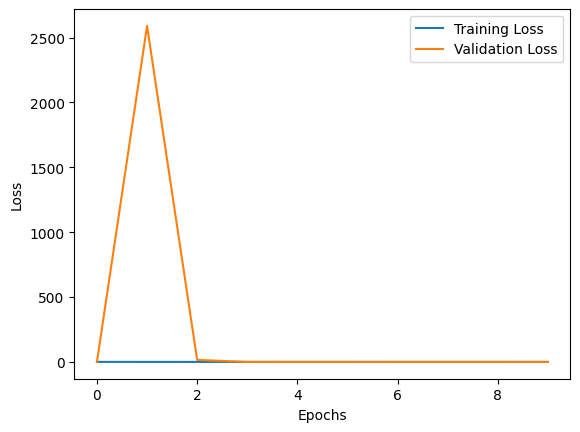

In [ ]:
# Access the training loss history
train_loss = history.history['loss']

# Access the training accuracy history
train_acc = history.history['acc']

# Access the validation loss history
val_loss = history.history['val_loss']

# Access the validation accuracy history
val_acc = history.history['val_acc']
# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



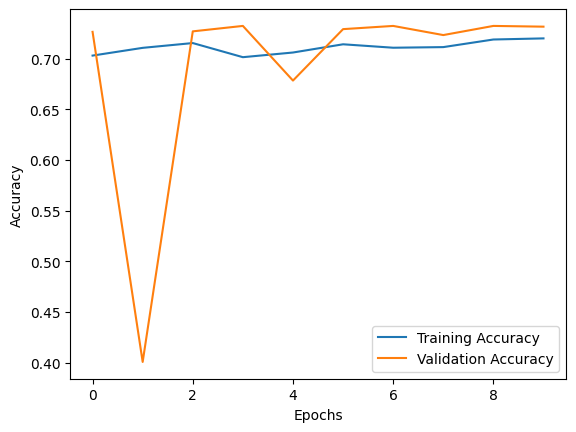

In [ ]:
# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()